# Experiment 1

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import json

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);
    c = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:2] == ".b" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[2:]))
            if( line[0:2] == ".g" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:2] == ".s" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:2] == ".c" ):
                X.c = np.append(X.c, float(line[3:]))
            if( line[0:2] == ".d" ):
                X.d = np.append(X.d, int(line[3:]))
            if( line[0:2] == ".l" ):
                X.l = np.append(X.l,float(line[3:]))
            if( line[0:2] == ".t" ):
                Ct+=1;
                X.t = np.append(X.t,float(line[3:]))
                if( Cb != Ct ):
                    print(X.b[Cb-1])
            if( line[0:2] == ".v" ):
                X.v = np.append(X.v,float(line[3:]))
            
    return X
    

D = extract_data( 'RES/summary.txt' )

f = open ('comp.json', "r")
Dj = json.loads(f.read())

Dr = [Dj[0]["entries"][j]["runtime"] for j in range(0,99,1)]


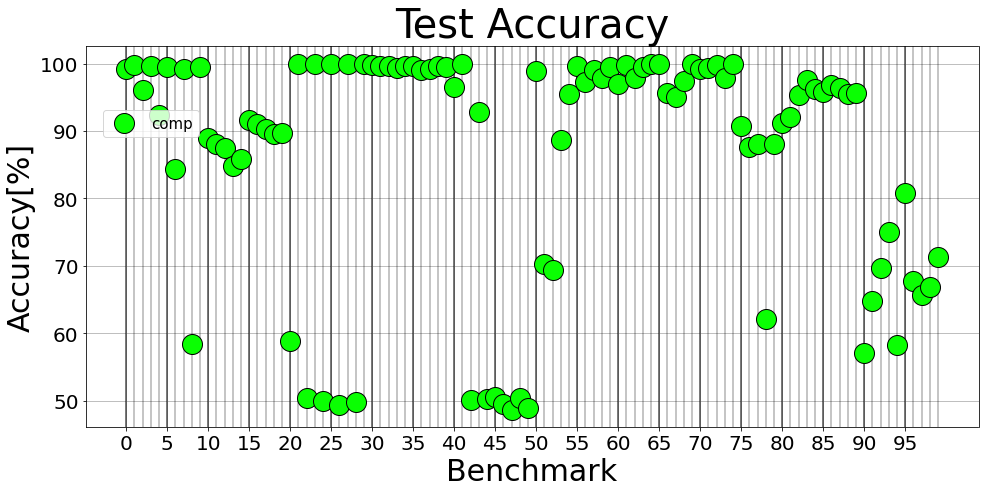

In [167]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(16,7))
ax = plt.gca()
plt.xticks(range(0,100,5), fontsize=50)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.3)
for b in range(0,100,5):
    plt.axvline(x=b, color='k', alpha = 0.5)
plt.grid()
#lineSD, = ax.plot(SD.b, SD.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
#lineISD, = ax.plot(ISD.b, ISD.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#lineIDSD, = ax.plot(IDSD.b, IDSD.t, 'o', c='white', alpha=1, markeredgecolor='k', markersize = 16, label = 'IDSD')
#linearMUESLI, = ax.plot(arMUESLI.b, arMUESLI.t, '*', c='red', alpha=1, markeredgecolor='k', markersize = 15, label = 'arMUESLI')
#linedcIDSD, = ax.plot(dcIDSD.b, dcIDSD.t, 'P', c='k', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')
#lineRASS, = ax.plot(rass.b, rass.t, 'o', c='gold', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')

line0, = ax.plot(D.b, D.t , 'o', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'comp')

#line1, = ax.plot(D1.b, D1.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#line2, = ax.plot(D2.b, D2.t , 'v', c='white', alpha=1, markeredgecolor='k', markersize = 16 , label = 'ITSD')


ax.legend( handles = [ line0 ], fontsize=15, bbox_to_anchor=(0.095, 0.75, 0.04, .102)) #,

plt.rcParams["font.family"] = "sans"
plt.xlabel('Benchmark', fontsize=30)
plt.ylabel('Accuracy[%]', fontsize=30)
plt.title('Test Accuracy', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('acc.png')

In [168]:
from tabulate import tabulate
def extract_row_data( X, runtime, label ):
    return [label, np.round(np.mean(X.l),2), np.round(np.mean(X.t),2), np.round(np.mean(X.g),2), np.mean(X.d), np.round(np.mean(abs(X.v-X.t)),2), np.mean(runtime)]

row = extract_row_data( D, Dr, "ensemble")

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row ] #row2
print(tabulate(table, headers = ["method","train accuracy[%]","test accuracy[%]","And gates","levels","overfit[%]","time[s]"], tablefmt="github"))

| method   |   train accuracy[%] |   test accuracy[%] |   And gates |   levels |   overfit[%] |   time[s] |
|----------|---------------------|--------------------|-------------|----------|--------------|-----------|
| ensemble |               98.17 |              86.48 |     1352.12 |    35.33 |         0.45 |   175.531 |


# Shannon Decomposition

In [161]:
def read_to_jr( algorithm ):
    D = extract_data( 'algorithms/fracvalid0/'+algorithm+'/RES/summary.txt' )
    f = open ('algorithms/fracvalid0/'+algorithm+'.json', "r")
    Dj = json.loads(f.read())
    Dr = [Dj[0]["entries"][j]["runtime"] for j in range(0,99,1)] 
    return [D,Dj,Dr]

[D0,D0j,D0r]= read_to_jr("sdec")
[D1,D1j,D1r]= read_to_jr("isdec")
[D2,D2j,D2r]= read_to_jr("itsdec")
[D3,D3j,D3r]= read_to_jr("ixtsdec")
[D4,D4j,D4r]= read_to_jr("dcsdec")
[D5,D5j,D5r]= read_to_jr("muesli")
[D6,D6j,D6r]= read_to_jr("xarmuesli")
[D7,D7j,D7r]= read_to_jr("xforestmuesli3")
[D8,D8j,D8r]= read_to_jr("xforestmuesli5")
[D9,D9j,D9r]= read_to_jr("xifgenS_s2_1024x1")
[D10,D10j,D10r]= read_to_jr("xifgenS_s2_2048x1")
[D11,D11j,D11r]= read_to_jr("xifgenS_s2_4096x1")
[D12,D12j,D12r]= read_to_jr("xifgenS_s2_1024x2")
[D13,D13j,D13r]= read_to_jr("xifgenS_s2_1024x4")
[D14,D14j,D14r]= read_to_jr("xforestS5")
[D15,D15j,D15r]= read_to_jr("xforestS3")

In [162]:
row0 = extract_row_data( D0, D0r, "sdec")
row1 = extract_row_data( D1, D1r, "isdec")
row2 = extract_row_data( D2, D2r, "itsdec")
row3 = extract_row_data( D3, D3r, "ixtsdec")
row4 = extract_row_data( D4, D4r, "dcsdec")
row5 = extract_row_data( D5, D5r, "muesli")
row6 = extract_row_data( D6, D6r, "xarmuesli")
row7 = extract_row_data( D7, D7r, "xforestmuesli3")
row8 = extract_row_data( D8, D8r, "xforestmuesli5")
row9 = extract_row_data( D9, D9r, "xifgenS_s2_1024x1")
row10 = extract_row_data( D10, D10r, "xifgenS_s2_2048x1")
row11 = extract_row_data( D11, D11r, "xifgenS_s2_4096x1")
row12 = extract_row_data( D12, D12r, "xifgenS_s2_1024x2")
row13 = extract_row_data( D13, D13r, "xifgenS_s2_1024x4")
row14 = extract_row_data( D14, D14r, "xforestS5")
row15 = extract_row_data( D15, D15r, "xforestS3")

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row0, row1, row2, row3,row4, row5, row6, row7, row8, row9, row10, row11, row12, row13, row14, row15 ] #row2
print(tabulate(table, headers = ["method","train accuracy[%]","test accuracy[%]","And gates","levels","overfit[%]","time[s]"], tablefmt="github"))

| method            |   train accuracy[%] |   test accuracy[%] |   And gates |   levels |   overfit[%] |   time[s] |
|-------------------|---------------------|--------------------|-------------|----------|--------------|-----------|
| sdec              |               100   |              68.58 |     2273.54 |    90.66 |         0.74 |   7.27725 |
| isdec             |               100   |              80.54 |     1028.05 |    28.91 |         0.49 |   8.04842 |
| itsdec            |               100   |              80.54 |      874.03 |    25.4  |         0.49 |   8.09261 |
| ixtsdec           |               100   |              81.04 |      840.38 |    25.52 |         0.47 |  11.0454  |
| dcsdec            |               100   |              76.23 |     1455.23 |    84.64 |         0.53 |  46.0513  |
| muesli            |                80.1 |              78.37 |       94.9  |    32.05 |         0.48 | 287.525   |
| xarmuesli         |               100   |              82.49 |